In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
rng=np.random.RandomState(0)

In [6]:
def make_lineardata(N=50,coef=0,itcp=0):
    x=10*rng.rand(N)
    y=coef*x+itcp+rng.randn(N)
    return x,y

In [7]:
x,y=make_lineardata(200,coef=3,itcp=8)

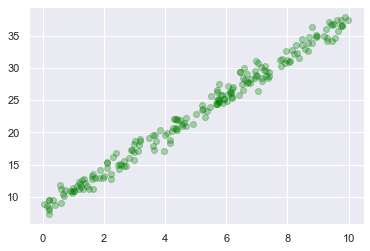

In [8]:
plt.scatter(x,y,color='green',alpha=0.3)

In [9]:
#ahora harremos una prediccion para ciertos datos
x_test=np.linspace(0,10,100)

model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_model=model.predict(x_test[:,np.newaxis])

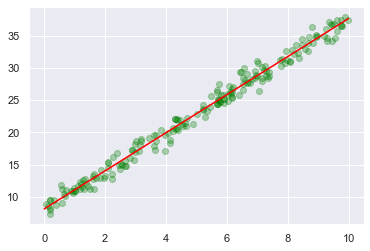

In [12]:
plt.scatter(x,y,color='green',alpha=0.3)
plt.plot(x_test[:,np.newaxis],y_model,color='red')

In [13]:
model.coef_

array([2.9561956])

In [14]:
model.intercept_

8.106941895542764

In [15]:
x=10*rng.rand(100,3)
y=0.5-np.dot(x,[.4,3,10])

model.fit(x,y)
model.intercept_, model.coef_

(0.4999999999999858, array([ -0.4,  -3. , -10. ]))

### Regresion del la funcion Base

#### Funciones de base Polinomica

In [ ]:
polynomial=PolynomialFeatures(include_bias=False)

In [79]:
#para manejar datos en las cuales las varibles no tiens relaciones lineales

from sklearn.pipeline import make_pipeline,Pipeline

poly_model=Pipeline([
    ('polynomial',polynomial), 
    ('linear',LinearRegression())

])


In [80]:
x=10*rng.rand(1000)
y=np.sin(x)+0.1*rng.randn(1000)

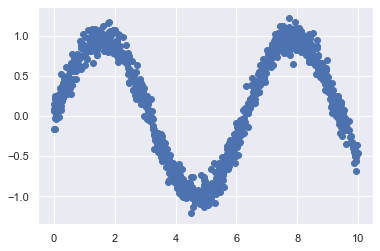

In [82]:
plt.scatter(x,y)

In [83]:
from sklearn.model_selection import GridSearchCV

In [86]:
grid=GridSearchCV(
    estimator=poly_model,
    param_grid=dict(
            polynomial__degree=list(range(1,20)),
            #polynomial__include_bias=[True,False],
            linear__fit_intercept=[True,False]
    ),
    cv=7
)

In [87]:
grid.fit(x[:,np.newaxis],y);
    

In [88]:
grid.best_params_

{'linear__fit_intercept': False, 'polynomial__degree': 8}

In [97]:
poly_model=make_pipeline(PolynomialFeatures(degree=8),LinearRegression(fit_intercept=True))

In [98]:
poly_model.fit(x[:,np.newaxis],y);

In [99]:
xtest=np.linspace(0,10,1000)
yresult=poly_model.predict(xtest[:,np.newaxis])

(0, 10)

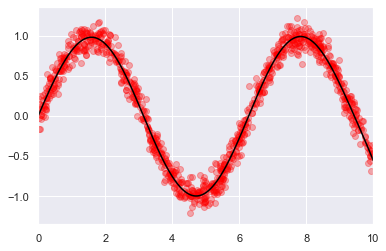

In [101]:
plt.scatter(x,y,color='red',alpha=0.3)
plt.plot(xtest,yresult,color='black')
plt.xlim(0,10)

In [110]:
poly_model.steps[1][1].coef_

array([ 0.00000000e+00,  9.85971352e-01, -1.13365039e-01,  8.91616229e-03,
       -1.11412156e-01,  4.64457678e-02, -7.34376505e-03,  5.17074016e-04,
       -1.36543252e-05])

#### Funciones de base Gaussiana